In [1]:
import pyemma
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
import numpy as np
from glob import glob

In [2]:
ls 100ns

bsub_ntl9_score_msmlag100ns_splittica_alleigen.sh
dtrajs_ntl9_lag100ns.npy
dtrajs_ntl9_lag100ns_2eigen.npy
ntl9_100ns_postprocess.ipynb
ntl9_100ns_top_model.ipynb
ntl9_cktest_lag100ns_outto2700ns.pdf
ntl9_cktest_lag100ns_outto2700ns.png
ntl9_cktest_lag100ns_outto2700ns_2eigen.pdf
ntl9_cktest_lag100ns_outto2700ns_2eigen.png
ntl9_cktest_lag10ns_outto2700ns.pdf
ntl9_cktest_lag10ns_outto2700ns.png
ntl9_cktest_lag10ns_outto2700ns_2eigen.pdf
ntl9_cktest_lag10ns_outto2700ns_2eigen.png
ntl9_cktest_lag200ns_outto2700ns.pdf
ntl9_cktest_lag200ns_outto2700ns.png
ntl9_cktest_lag200ns_outto2700ns_2eigen.pdf
ntl9_cktest_lag200ns_outto2700ns_2eigen.png
ntl9_cktest_lag300ns_outto2700ns.pdf
ntl9_cktest_lag300ns_outto2700ns.png
ntl9_cktest_lag300ns_outto2700ns_2eigen.pdf
ntl9_cktest_lag300ns_outto2700ns_2eigen.png
ntl9_fractions.pdf
ntl9_fractions.png
ntl9_its_lag100ns_diffeigen.pdf
ntl9_its_lag100ns_diffeigen.png
ntl9_its_multilag.pdf
ntl9_its_multilag.png
ntl9_its_multilag_2eigen.pdf
ntl9_its_multilag_

In [3]:
dtrajs = list(np.load('100ns/dtrajs_ntl9_lag100ns.npy'))

In [12]:
# 200 ns

In [13]:
msm = pyemma.msm.estimate_markov_model(dtrajs, 1000)

In [14]:
msm.nstates

100

In [15]:
pcca = msm.pcca(2)

In [16]:
pcca.coarse_grained_stationary_probability

array([ 0.14060874,  0.85939126])

In [17]:
# 0 is unfolded, 1 is folded

In [18]:
msm.metastable_sets

[array([ 1,  3,  4,  5,  7,  8,  9, 10, 11, 13, 15, 16, 17, 18, 19, 20, 21,
        23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41,
        42, 43, 44, 46, 47, 48, 49, 50, 53, 54, 55, 56, 59, 60, 61, 63, 64,
        66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 84, 86,
        87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ 0,  2,  6, 12, 14, 22, 29, 40, 45, 51, 52, 57, 58, 62, 65, 71, 74,
        83, 85, 90])]

In [19]:
meta_sets = msm.metastable_sets

In [20]:
np.save('ntl9_scorelag100ns_metastable_sets', msm.metastable_sets)

In [21]:
meta_membs = msm.metastable_memberships

In [22]:
np.save('ntl9_scorelag100ns_metastable_memberships', msm.metastable_memberships)

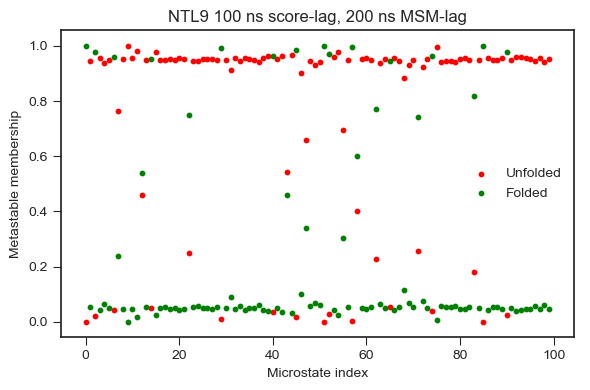

In [23]:
plt.figure(dpi=100)
plt.scatter(range(100), meta_membs[:,0], color='red', s=10, label='Unfolded')
plt.scatter(range(100), meta_membs[:,1], color='green', s=10, label='Folded')
plt.xlabel('Microstate index')
plt.ylabel('Metastable membership')
plt.title('NTL9 100 ns score-lag, 200 ns MSM-lag')
plt.legend()
plt.tight_layout()
plt.savefig('ntl9_scorelag100ns_metastable_membs.png', dpi=300)
plt.show()